In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

##習題一題目##
wine = pd.read_excel("Wine.xlsx") #178 14
ratings = np.array(wine)
#ratings = np.delete(ratings, 13, axis=1)
categories = wine.columns

##習題二題目##
cancer = load_breast_cancer()
cancer.target[[10, 50, 85]]
#array([0, 1, 0])
list(cancer.target_names)
#["malignant", "benign"]

print(ratings)
print(ratings.shape) #178 13
print(categories)
#categories = categories[-"Customer_Segment"]

[[1.423e+01 1.710e+00 2.430e+00 ... 3.920e+00 1.065e+03 1.000e+00]
 [1.320e+01 1.780e+00 2.140e+00 ... 3.400e+00 1.050e+03 1.000e+00]
 [1.316e+01 2.360e+00 2.670e+00 ... 3.170e+00 1.185e+03 1.000e+00]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 1.560e+00 8.350e+02 3.000e+00]
 [1.317e+01 2.590e+00 2.370e+00 ... 1.620e+00 8.400e+02 3.000e+00]
 [1.413e+01 4.100e+00 2.740e+00 ... 1.600e+00 5.600e+02 3.000e+00]]
(178, 14)
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')


習題一
1. 繪製變數間的相關係數圖
2. 繪製一張含每個變數的箱型圖
3. 進行主成分分析繪製scree plot 與 pareto plot
4. 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。
利用主成分分析取得前兩項成分，並繪製其散布圖。
是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。
5. 如果採三個主成分，則可繪製如圖三與圖四的立體圖。觀察圖三、四是否比圖二具備更好的群組分辨能力。
請嘗試旋轉立體圖的角度以取得最好的辨別視野。
6. Z_1,Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

1. 繪製變數間的相關係數圖觀察變數間是否存在相關性

從圖中可知，許多變數間都存在有一定的相關性，如變數Customer_Segment，跟多個變數的相關係數都來到了0.7以上。

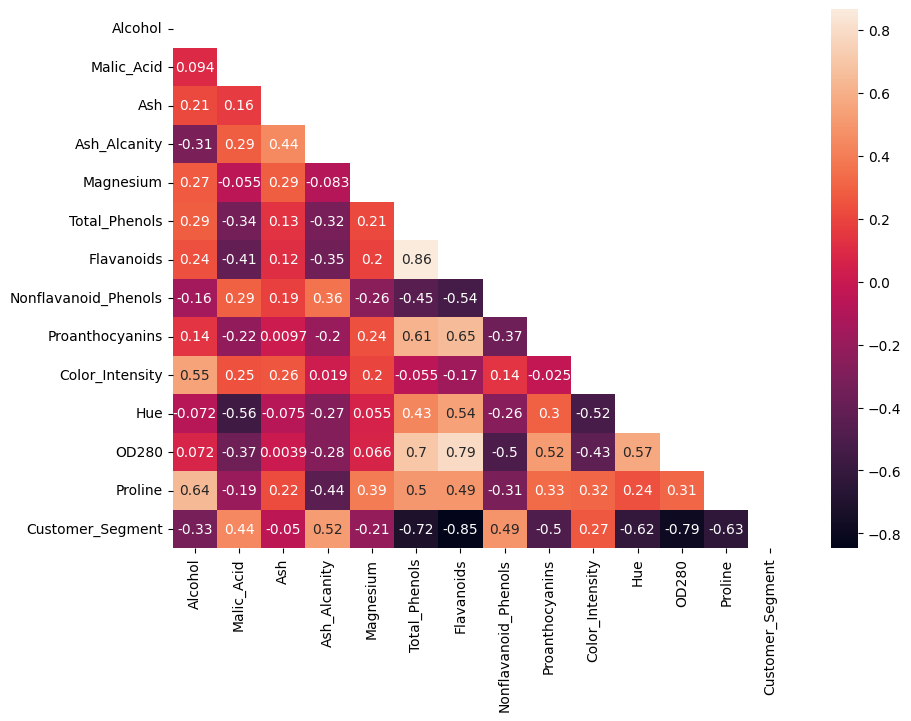

In [4]:
import seaborn
import pandas as pd
df = pd.DataFrame(ratings, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask #呈現一半就好了

plt.figure(figsize=(10, 7))
seaborn.heatmap(R, annot = True, mask = mask)
plt.show()

2. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考

從圖中可知，變數之間的差異極大，因此如果能先進行標準化後再來做資料分析會是較好的選擇

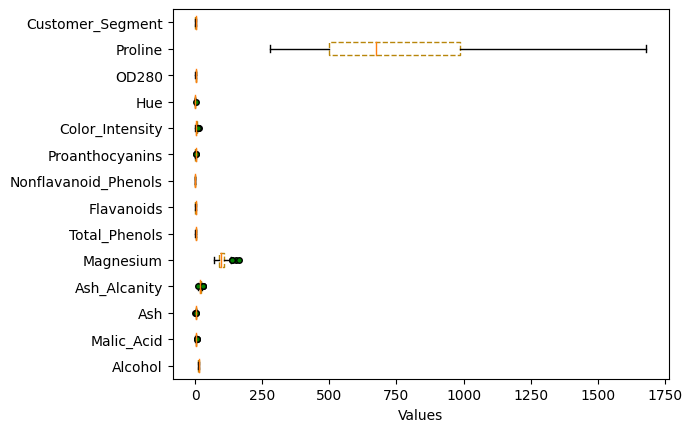

In [3]:
fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green",markersize = 4, linestyle = "none")

ax.boxplot(ratings, boxprops = boxprops, flierprops = flierprops, 
           labels = categories, vert = False)
ax.set_xlabel("Values")
plt.show()


根據上圖相形圖之結果，我們將資料進行標準化後再重新觀察其相形圖，可知變數間的差異不再如此巨大

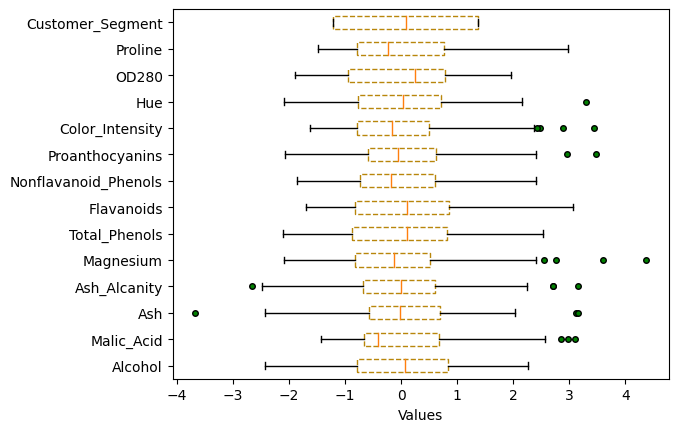

In [4]:
#因為不同項目之間的數字大小與變異相差頗大，對主成分分析可能不利，因此先進行標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings) # 將資料進行標準化
# 繪製標準化後的圖形
fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green", markersize = 4, linestyle = "none")
ax.boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel("Values")
plt.show()

3. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

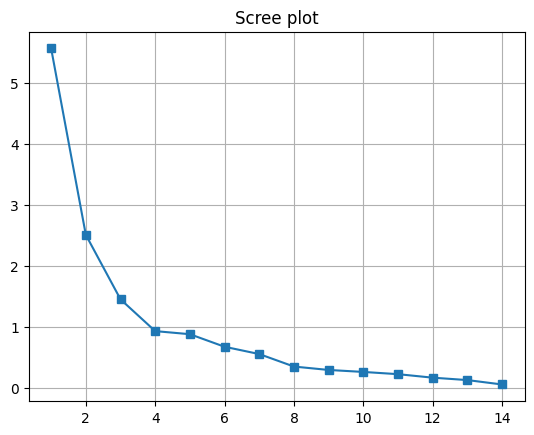

[5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.35201176 0.29620602 0.26378805 0.2271244  0.16975037
 0.13029618 0.05813894]


In [5]:
# 計算共變異數矩陣
mu_x = ratings_.mean(axis=0) #得到變數的observation mean
#(9,)
Tmp = ratings_ - mu_x 
#(x-mu)^t (x-mu)

# 觀察變異數
Sx_numpy = np.cov(ratings_.T , bias = False) 
# 計算特徵值與特徵向量
from numpy.linalg import eig
w, v = eig(Sx_numpy) #eigenvalue沒照大小排序
# 排序特徵值跟特徵向量
idx = np.argsort(w)[::-1]
eigvals = w[idx] #排序後之特徵值
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

#畫圖
#fig, axes = plt.subplots(1, 2, figsize = [10, 5])
from matplotlib.ticker import PercentFormatter
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker="s")
plt.title("Scree plot")
plt.grid(True)
#plt.show()
plt.show()
print(eigvals)
twoPC = eigvecs[:2]

4. 繪製標準化前與標準化後的兩個主成分的散佈圖

(2, 178)


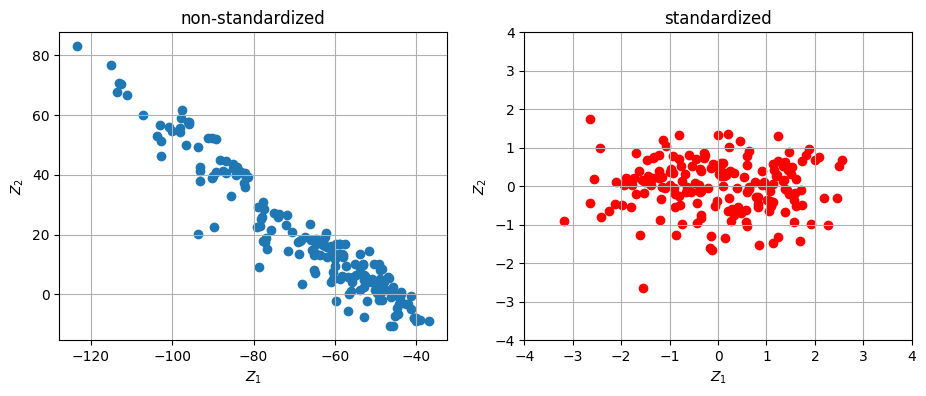

In [6]:
#標準化前
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from numpy.linalg import matrix_rank, eig
fig, axes = plt.subplots(1, 2, figsize = [11, 4])

#print(eigvals)
#print(eigvals[:2])
#print(eigvecs[:2])
twoPC = eigvecs[:2] #(2,14)
Z = twoPC @ ratings.T

axes[0].scatter(Z[0, :], Z[1, :])
#plt.xlim(-4, 4)
#plt.ylim(-4, 4)
axes[0].grid()
axes[0].set_xlabel("$Z_1$")
axes[0].set_ylabel("$Z_2$")
axes[0].set_title("non-standardized")
#plt.show()
#標準化後
twoPC = eigvecs[:2] #(2,14)
Z = twoPC @ ratings_.T
axes[1].scatter(Z[0, :], Z[1, :], color="red")
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(-4, 4)
axes[1].grid()
axes[1].set_xlabel("$Z_1$")
axes[1].set_ylabel("$Z_2$")
axes[1].set_title("standardized")
print(Z.shape) #(2,178)

依據每個資料的標籤1,2,3(Customer_Segment)，為每個在散布圖上的資料點塗上顏色

(178,)


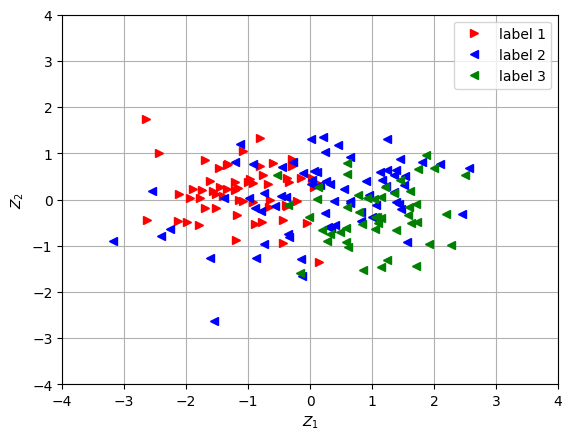

In [7]:
label = wine["Customer_Segment"]
print(label.shape) #(178,)

twoPC = eigvecs[:2] #(2,14)
Z = twoPC @ ratings_.T #(2,178)

newdata = Z.T #(178,2)
C1 = newdata[label==1]
C2 = newdata[label==2]
C3 = newdata[label==3]
#print(C1.shape) #(59,2)

plt.plot(C1[:,0], C1[:,1], "r>", label = "label 1")
plt.plot(C2[:,0], C2[:,1],"b<", label = "label 2")
plt.plot(C3[:,0], C3[:,1],"g<", label = "label 3")
plt.grid()
plt.xlim(-4, 4), plt.ylim(-4, 4)
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.legend()

6. 如果採三個主成分，則可繪製如圖三與圖四的立體圖。觀察圖三、四是否比圖二具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

(3, 14)
(178, 3)
(59, 3)


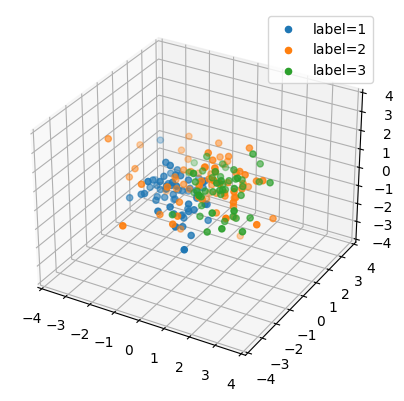

In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
#prepared
threePC = eigvecs[:3] #(3,14)
ZZ = threePC @ ratings_.T
print(threePC.shape) 

#label
label = wine["Customer_Segment"]
newdata = ZZ.T #(178,3)
print(newdata.shape)

# 製作 color map
fig = plt.figure()
#ax = Axes3D(fig)
ax = plt.subplot(projection='3d') 
C1 = newdata[label==1]
C2 = newdata[label==2]
C3 = newdata[label==3]
print(C1.shape)#(59,3)

ax.scatter(C1[:,0],C1[:,1],C1[:,2], label="label=1")
ax.scatter(C2[:,0],C2[:,1],C2[:,2], label="label=2")
ax.scatter(C3[:,0],C3[:,1],C3[:,2], label="label=3")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)
ax.legend()

嘗試旋轉3D圖觀察散布圖

(3, 14)
(178, 3)
(59, 3)


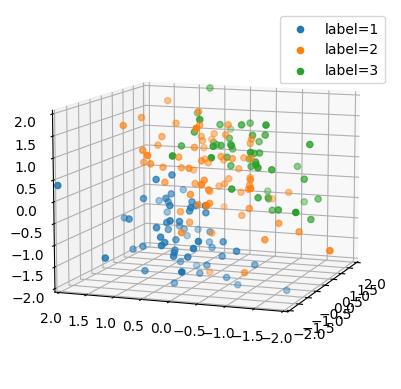

In [9]:
threePC = eigvecs[:3] #(3,14)
ZZ = threePC @ ratings_.T
print(threePC.shape) 

#label
label = wine["Customer_Segment"]
newdata = ZZ.T #(178,3)
print(newdata.shape)

# 製作 color map
fig = plt.figure()
#ax = Axes3D(fig)
ax = plt.subplot(projection='3d') 
C1 = newdata[label==1]
C2 = newdata[label==2]
C3 = newdata[label==3]
print(C1.shape)#(59,3)

ax.scatter(C1[:,0],C1[:,1],C1[:,2], label="label=1")
ax.scatter(C2[:,0],C2[:,1],C2[:,2], label="label=2")
ax.scatter(C3[:,0],C3[:,1],C3[:,2], label="label=3")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.legend()


ax.view_init(10, 200)

重複習題一的問題，資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數30個，樣本數569位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。請注意，由於變數多，因此如前一練習的相關性圖，必須做些改變。

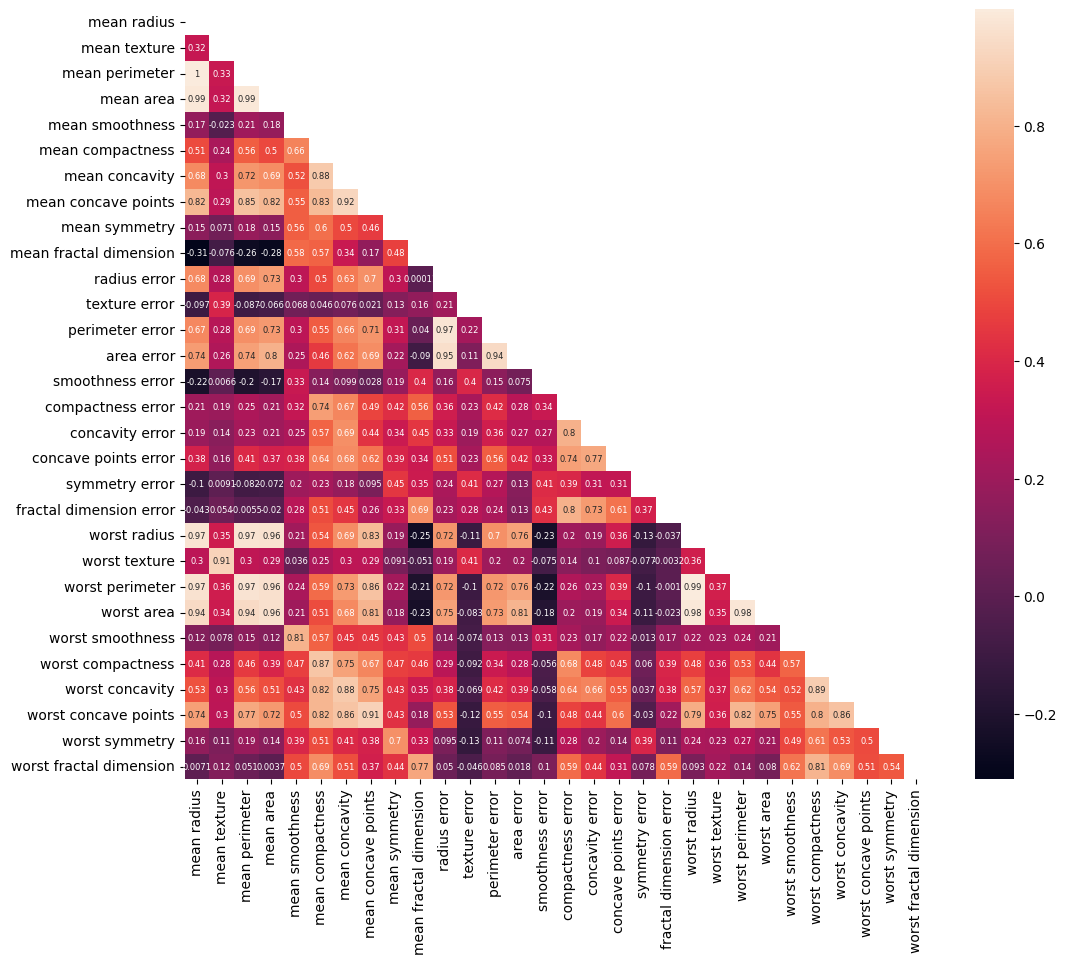

In [10]:
#習題二題目#
cancer = load_breast_cancer(return_X_y=True, as_frame=True) 
bunch = cancer[0] #(569,30)
categories = bunch.columns

target = cancer[1] #['malignant', 'benign']

df = pd.DataFrame(bunch, columns = categories)
R = df.corr()

mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask #呈現一半就好了
plt.figure(figsize=(12, 10))
seaborn.heatmap(R, annot = True, mask = mask, annot_kws={'fontsize':6})
plt.show()

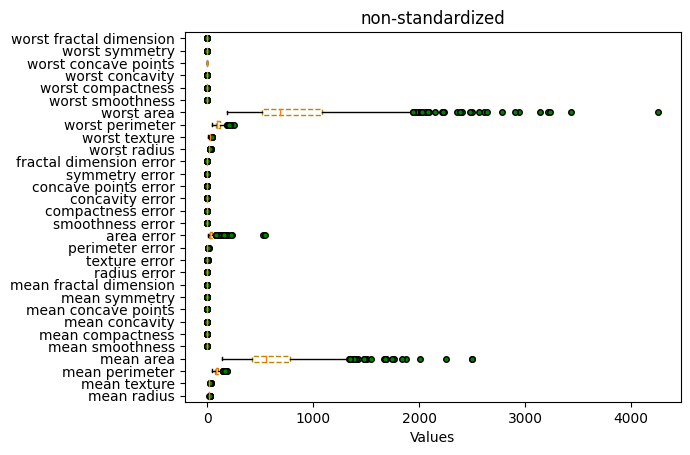

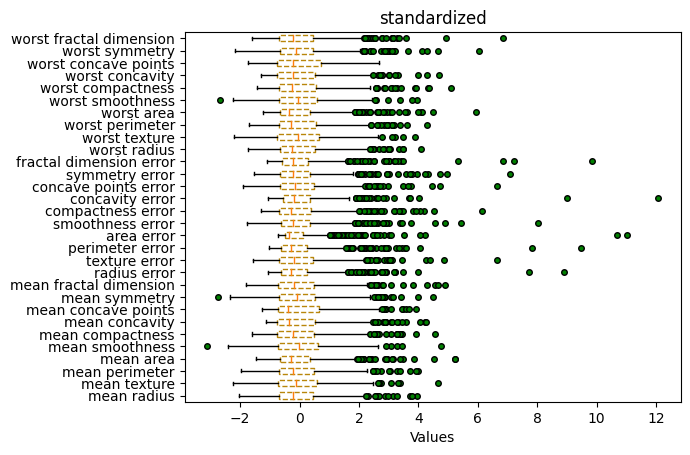

In [11]:
fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green",markersize = 4, linestyle = "none")

ax.boxplot(bunch, boxprops = boxprops, flierprops = flierprops, 
           labels = categories, vert = False)
ax.set_xlabel("Values")
ax.set_title("non-standardized")
plt.show()

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(bunch)
# Apply transform to dataset.
bunch_ = scaler.transform(bunch) 

fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green", markersize = 4, linestyle = "none")
ax.boxplot(bunch_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel("Values")
ax.set_title("standardized")
plt.show()


(30, 30)


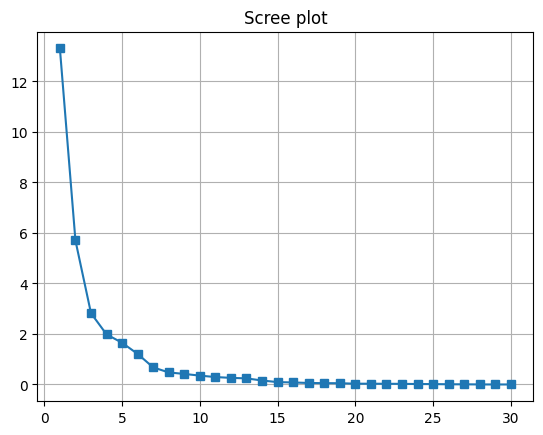

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(bunch_)
#print(pca.explained_variance_ratio_) #共變異矩陣特徵值佔比
#print(pca.explained_variance_) #共變異矩陣特徵值
#print(pca.components_) #共變異矩陣的特徵向量
eigvals = pca.explained_variance_
eigvecs = pca.components_.T
print(eigvecs.shape) #(30,30)

Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker="s")
plt.title("Scree plot")
plt.grid(True)
plt.show()

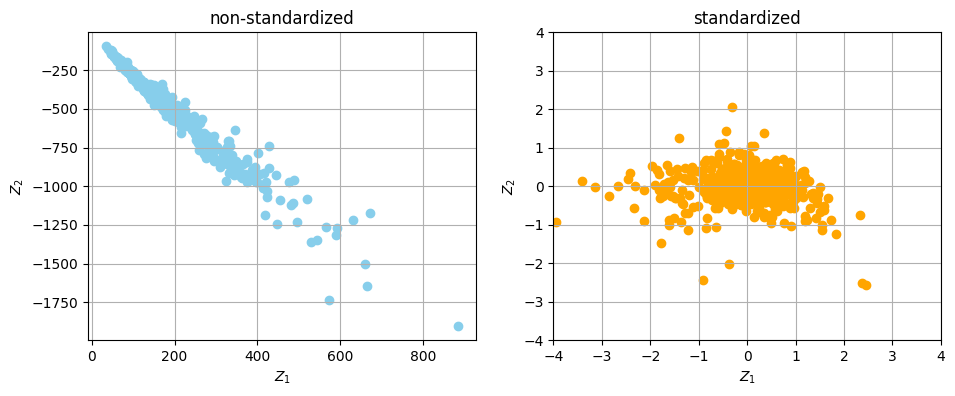

In [13]:
fig, axes = plt.subplots(1, 2, figsize = [11, 4])

#non-standardized
twoPC = eigvecs[:2]
Z = twoPC @ bunch.T 
axes[0].scatter(Z[0:1], Z[1:], color = "skyblue")
axes[0].grid()
axes[0].set_xlabel("$Z_1$")
axes[0].set_ylabel("$Z_2$")
axes[0].set_title("non-standardized")

#standardized
Z = twoPC @ bunch_.T 
axes[1].scatter(Z[0:1], Z[1:], color = "orange")
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(-4, 4)
axes[1].grid()
axes[1].set_xlabel("$Z_1$")
axes[1].set_ylabel("$Z_2$")
axes[1].set_title("standardized")
plt.show()

(569, 31)
(569, 30)
(2, 31)
(2, 569)


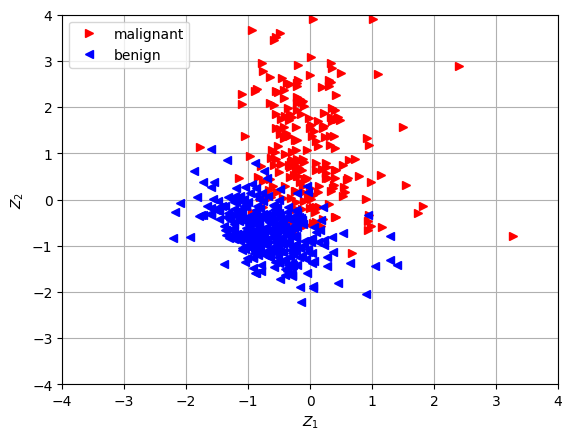

In [14]:
label = np.array(target)

#combine the label to the dataframe
con = np.c_[bunch_, label]
print(con.shape) #(569,31)
print(bunch_.shape) #(569,30)

#pca
pca = PCA().fit(con)
eigvals = pca.explained_variance_
eigvecs = pca.components_.T
twoPC = eigvecs[:2]
print(twoPC.shape) #(2,31)
Z = twoPC @ con.T 
print(Z.shape) #(2,569)

newdata = Z.T #(569,2)
C1 = newdata[label==0]
C2 = newdata[label==1]

plt.plot(C1[:,0], C1[:,1], "r>", label = "malignant")
plt.plot(C2[:,0], C2[:,1],"b<", label = "benign")
plt.grid()
plt.xlim(-4, 4), plt.ylim(-4, 4)
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.legend()

(3, 31)
(569, 3)


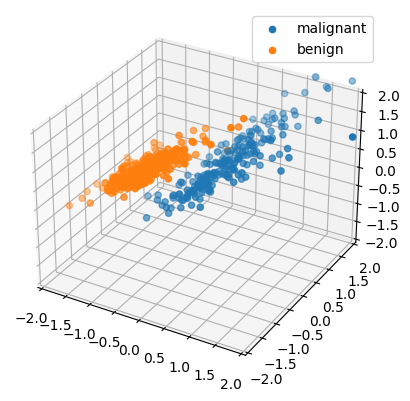

In [15]:
#prepared
threePC = eigvecs[:3] 
ZZ = threePC @ con.T #(3,31)*(31,569)=(3,569)
print(threePC.shape) #(3,31)

#label
label = np.array(target) #(569,)
newdata = ZZ.T 
print(newdata.shape) #(569,3)


# 製作 color map
fig = plt.figure()
ax = Axes3D(fig)
ax = plt.subplot(projection='3d') 
C1 = newdata[label==0]
C2 = newdata[label==1]

ax.scatter(C1[:,0],C1[:,1],C1[:,2], label="malignant")
ax.scatter(C2[:,0],C2[:,1],C2[:,2], label="benign")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.legend()

旋轉3D圖

(3, 31)
(569, 3)


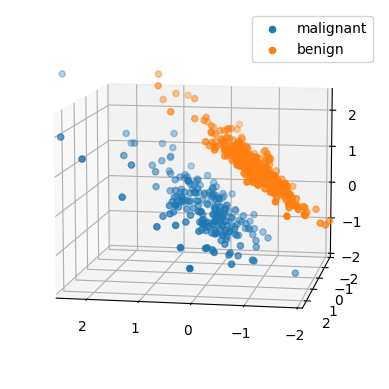

In [16]:
#prepared
threePC = eigvecs[:3] 
ZZ = threePC @ con.T #(3,31)*(31,569)=(3,569)
print(threePC.shape) #(3,31)

#label
label = np.array(target) #(569,)
newdata = ZZ.T 
print(newdata.shape) #(569,3)


# 製作 color map
fig = plt.figure()
ax = Axes3D(fig)
ax = plt.subplot(projection='3d') 
C1 = newdata[label==0]
C2 = newdata[label==1]

ax.scatter(C1[:,0],C1[:,1],C1[:,2], label="malignant")
ax.scatter(C2[:,0],C2[:,1],C2[:,2], label="benign")
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set_zlim(-2, 2.5)
ax.legend()

ax.view_init(10, 100)